Zdroj: https://youtube.com/watch?v=Kln0ZQ7sX8k&listen=false\
Pokud nejsem schopen zjistit Hessián, mohu jej aproximovat Gauss-Newtonovou metodou.

$ y = f(x; \beta) + \epsilon $\
$x$... nezávislá proměnná\
$\beta$... koeficient\
$\epsilon$... šum

Předpokládám, že funkce je nelineárně závislá na $\beta$.

Reziduum $r_i = y_i - f(x_i; \beta)$\
minimalizuji $SSRE = \sum{{r_i}^2}$

Ve funkci jedné proměnné minimum derivace najdu Newtonovou metodou:\
$x_{t+1} = x_{t}  + \frac{f'(x_t)}{f''(x_t)}$

Obdoba pro funkci více proměnných:\
$x_{t+1} = x_{t}  + {H_x}^{-1}\nabla_xf$


Derivace funkce SSRE při zvoleném koeficientu $\beta_j$ (j je iterace):
Pro gradient jsme použili řetězové pravidlo.

$\nabla_{\beta_j}({SSRE)} = \sum{2r_i·\frac{\partial{r_i}}{\partial{\beta_j}}}= \sum{-2(r_i·\frac{\partial{f_i}}{\partial{\beta_j}})}$


Proč je tam to $2r_i$? Protože funkce SSRE je $SSRE = \sum{{r_i}^2}$ a její derivace je $\sum{2r_i·\frac{\partial{r_i}}{\partial{\beta_j}}} $\
Zároveň $r_i = y_i - f(x_i; \beta)$, $\sum{2r_i·\frac{\partial{r_i}}{\partial{\beta_j}}} = \sum{2r_i·\frac{\partial{y_i - f(x_i; \beta)}}{\partial{\beta_j}}} = \sum{2r_i·\frac{{0 - \partial f(x_i; \beta)}}{\partial{\beta_j}}} = \sum{-2(r_i·\frac{\partial{f_i}}{\partial{\beta_j}})}$ (parciální derivace $y_i$ vůči $beta_j$ je 0)

\
\
Generalizace (derivace SSRE vůči všem koeficientům - gradient):

$\nabla({SSRE)}  = -2·J^T·\vec{r}$

J je Jakobián, předpokládáme, že máme až p koeficientů (sloupců) a n měření/bodů (řádků).\
<img src="./picture_gaussNewton1.PNG" alt="Jakobián"  width="300"  height="150">

Pro druhou derivaci dle j a dle k použijeme součinové pravidlo derivací. V okamžiku, kdy se poprvé objevila ve vztahu aproximace se z toho stala Gauss-Newtonova metoda.

$\nabla_{\beta_j beta_k}(SSRE) = -2 \sum (-\frac{\partial{f_i}}{\partial{\beta_k}}·\frac{\partial{f_i}}{\partial{\beta_j}}+ r_i·\frac{\partial^2{f_i}}{\partial{\beta_j} \partial{\beta_k}}) \approx 2 \sum {\frac{\partial{f_i}}{\partial{\beta_k}}·\frac{\partial{f_i}}{\partial{\beta_j}}} $

\
\
S použitím dané aproximace Hessiánu Gauss-Newtonovou metodou můžeme použít kompaktní tvar
$\nabla_{\beta_j beta_k}(SSRE) \approx 2 \sum {\frac{\partial{f_i}}{\partial{\beta_k}}·\frac{\partial{f_i}}{\partial{\beta_j}}} = 2·J^T·J$\
($J^T·J$ je velikost vektoru jakobiánu)

\
\
\
Newtonova metoda více proměnných:

$\beta_{t+1} = \beta{t} - ((\nabla_\beta)^2(SSRE))^{-1}\nabla_\beta(SSRE) = \beta{t} - H^{-1}\nabla_\beta(SSRE)$

\
\
Gauss-Newtonova metoda více proměnných:
$\beta_{t+1} = \beta{t} - ((\nabla_\beta)^2(SSRE))^{-1}\nabla_\beta(SSRE) = \approx \beta{t} - (2·{J_t}^T·{J_t})^{-1} (-2·{J_t}^T·r_t) = \beta_{t} + ({J_t}^T·{J_t})^{-1} {J_t}^T·r_t$

\
\
\
\
\
\
Jak tedy udělat tu aproximaci funkce jako takovou?



Aproximace funkce:\
$f(x; \beta) \approx f(x; \beta_t) + \nabla_\beta f(x; \beta_t)[\beta-\beta_t]$

Aproximace reziduí:\
$r_i = y_i - f(x; \beta) \approx y_i - f(x; \beta_t) - \nabla_\beta f(x; \beta_t)[\beta-\beta_t]$

Zavedeme si pracovní veličiny (s vlnkou, ty jsou počítány průběžně iteračně):\
$ \tilde{y_i} =  y_i - f(x; \beta_t)$\
$ \tilde{x_i} = \nabla_\beta f(x; \beta_t) $\
$ \tilde{\beta} = \beta-\beta_t $


Po zavedení pracovních veličin získáváme pro aproximaci rezidua kompaktní LINEÁRNÍ vztah \
$r_i \approx \tilde{y_i} - {\tilde{x_i}}^T\tilde{\beta}$

Známe čísla $y_i$, $x_i$, $\beta$ se snažíme najít.
\
\
\
Budeme tedy minimalizovat bety ve vztahu:\
$\tilde{y} - \tilde{X}·{\beta}$\
kde $\tilde{X}$ je jakobiánem naší funkcí $J_f$
\
\
\
Řešením pro pracovní koeficienty $\tilde{\beta}$ je tedy vztah:
$\tilde{\vec{\beta}} = ({J_t}^T·J_t)^{-1}{J_t}^T·\tilde{\vec{y}} = ({J_t}^T·J_t)^{-1}{J_t}^Tr_t$
\
Proč je tam teď jen to $r_t$? Viz $r_i = y_i - f(x_i; \beta)$ a derivace y_i dle koeficientu je 0.

Pokud zpětně rozbouráme $\tilde{\beta}$:
$\nabla_\beta f(x; \beta_t) = ({J_t}^T·J_t)^{-1}{J_t}^Tr_t$

Přeskládáním rovnice:
$\beta_{t+1} = \beta_{t} + ({J_t}^T·{J_t})^{-1} {J_t}^T·r_t$
\
\
\
\
\



In [644]:
import numpy as np
import numpy.typing as npt
import typing
import scipy.linalg as spLinalg
import scipy.optimize as spOptimize
import matplotlib.pyplot as plt
import sympy as sp

Vyzkoušejme si 1D případ pro funkci níže:
$y = \frac {2x}{3+x}$

In [645]:
def functionChaos(a: float, b: float, independent:npt.NDArray[np.float32], chaosMag: typing.Optional[float] = 0.2) -> npt.NDArray[np.float32]:
    # funkce s bordýlkem
    result =  (a*independent)/(b+independent)
    return np.random.normal(result, chaosMag, len(result))

def functionPure(a: float, b: float, independent:npt.NDArray[np.float32]) -> npt.NDArray[np.float32]:
    # funkce bez bordýlku
    return (a*independent)/(b+independent)


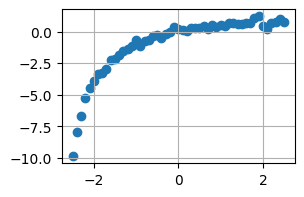

In [646]:
a: float = 2.0
b: float = 3.0
x: npt.NDArray[np.float32] = np.linspace(-2.5, 2.5, 51)
y: npt.NDArray[np.float32] = functionChaos(a=a, b=b, independent=x)
fig,ax = plt.subplots()
ax.scatter(x,y)
ax.grid()
fig.set_size_inches(3,2)

Teď numericky vyřešíme Jakobián\
<img src="./picture_gaussNewton1.PNG" alt="Jakobián"  width="300"  height="150">

In [647]:
def Jacobian(fInput: typing.Callable[[float, float, npt.NDArray[np.float32]], npt.NDArray[np.float32]],
             a: float,
             b: float,
             independent: npt.NDArray[np.float32]) -> npt.NDArray[np.float32]:
    delta: float = 1e-6
    dfda: npt.NDArray[np.float32] = (fInput(a + delta, b, independent) - fInput(a - delta, b, independent))/(2*delta)
    dfdb: npt.NDArray[np.float32] = (fInput(a, b + delta, independent) - fInput(a, b - delta, independent))/(2*delta)
    return np.column_stack([dfda, dfdb])


$\beta_{t+1} = \beta_{t} + ({J_t}^T·{J_t})^{-1} {J_t}^T·r_t$

In [648]:
def gaussNewton(
    fInput: typing.Callable[[float, float, npt.NDArray[np.float32]], npt.NDArray[np.float32]],
    independent: npt.NDArray[np.float32],
    dependent: npt.NDArray[np.float32],
    a0: float,
    b0: float,
    tolerance: typing.Optional[float] = 1e-6,
    maxIter: typing.Optional[int] = 100
):
    """Returns the 1D array with optimized function coefficients for the (a*x)/(b+c) function using the Gauss-Newton method.
    Args:
        fInput (typing.Callable[[float, float, npt.NDArray[np.float32]], npt.NDArray[np.float32]]): input function (1D)
        x (npt.NDArray[np.float32]): 1D array of independent variable values
        y (npt.NDArray[np.float32]): 1D array of dependent variable values (measurement)
        a0 (float): first guess of a in (a*x)/(b+c)
        b0 (float): first guess of b in (a*x)/(b+c) 
        tolerance (typing.Optional[float], optional): error threshold. Defaults to 1e-6.
        maxIter (typing.Optional[int], optional): number of iterations after . Defaults to 100.

    Returns:
        _type_: 1D-array with with a,b coefficients of the (a*x)/(b+c)
    """
    old:npt.NDArray[np.float32] = np.array([a0,b0])
    new:npt.NDArray[np.float32] = np.array([a0,b0])
    iteration: int = 0
    
    while (iteration < maxIter):
        old                             = new[:]    
        J:npt.NDArray[np.float32]       = Jacobian(fInput, a= old[0], b= old[1], independent = independent)
        yTilde:npt.NDArray[np.float32]  = dependent - fInput(a=old[0], b= old[1], independent = independent)
        new                             = old + np.linalg.inv(J.T@J)@J.T@yTilde #linalg.inv namísto np.matrix(...).I
        iteration += 1
        if iteration% 500 == 0: print(iteration, new.tolist(), np.linalg.norm(old-new))
        if np.linalg.norm(old-new) < tolerance: break
    print(f"Finished in {iteration} iteration, results: {new.tolist()}, residual magnitude: {np.linalg.norm(old-new)}")
    return new

Finished in 45 iteration, results: [2.0141557066595728, 3.010522735771389], residual magnitude: 4.136213619942719e-13


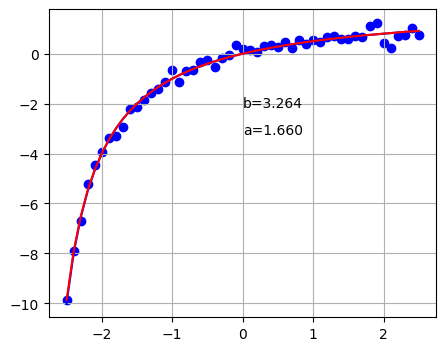

In [649]:
chaosPercentage: float = 0.25
a0 = np.random.uniform(low=(1.0-chaosPercentage)*a, high=(1.0+chaosPercentage)*a)
b0 = np.random.uniform(low=(1.0-chaosPercentage)*b, high=(1.0+chaosPercentage)*b)
aNew, bNew = gaussNewton(
    fInput= functionPure,
    independent= x,
    dependent= y,
    a0 = a0,
    b0 = b0,
    tolerance=1e-12,
    maxIter=10000
)


fig,ax = plt.subplots()
ax.scatter(x,y, color="blue")
ax.plot(
    x,
    functionPure(a=a, b=b, independent=x),
    color="blue"
)

ax.plot(
    x,
    functionPure(a=aNew, b=bNew, independent=x),
    color="red"
)
xAvg: float = 0.5*(min(x)+max(x))
yAvg: float = 0.5*(min(y)+max(y))
ax.text(x=xAvg, y=yAvg*0.75,s=f"a={a0:.3F}")
ax.text(x=xAvg, y=yAvg*0.50,s=f"b={b0:.3F}")
ax.grid()

fig.set_size_inches(5,4)

Proložme modulovaný gaussovský rozpad\
$f(x) = -y_0 sin(e^{-kt})$

Finished in 7 iteration, results: [1.1989257450085438, 0.21077947830523755], residual magnitude: 6.000824778866873e-13


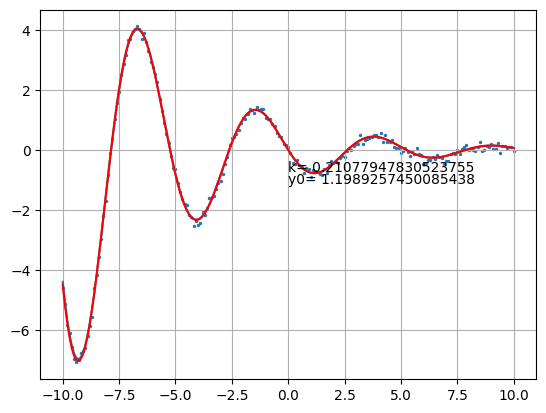

In [650]:
y0: float = 1.2
k: float = 0.21
residualVectorMagnitude: float = 1e-9

def functionPure(a: float, b: float, independent: npt.NDArray[np.float32]) -> npt.NDArray[np.float32]:
    return -np.sin(a*independent)*(np.exp(-b*independent))

def functionChaos(a: float, b: float, independent: npt.NDArray[np.float32], chaosMag: typing.Optional[float] = 0.15) -> npt.NDArray[np.float32]:
    pure: npt.NDArray[np.float32]   = functionPure(a, b, independent)
    chaos: npt.NDArray[np.float32]  = np.random.normal(pure,  scale=+chaosMag, size=len(pure))
    return chaos

x:npt.NDArray[np.float32] = np.linspace(-10.0, 10.0, 201)
y_calculated:npt.NDArray[np.float32] = functionPure(y0, k, x)
y_measured:npt.NDArray[np.float32] = functionChaos(y0, k, x, chaosMag=0.1)

Y0: float
K: float
y0_estimate: float = 1.1
k_estimate: float = 0.15
Y0, K = gaussNewton(
    fInput=functionPure,
    independent= x,
    dependent= y_measured,
    a0=y0_estimate,
    b0=k_estimate,
    tolerance=residualVectorMagnitude,
    maxIter=10000
)

yRegression: npt.NDArray[np.float32] = functionPure(Y0, K, x)
plt.plot(x,y_calculated)
plt.scatter(x,y_measured, s= 2)
plt.plot(x, yRegression, color="red")
xAVG: float = 0.5*(max(x)+min(x))
yAVG: float = 0.5*(max(y_calculated)+min(y_calculated))
plt.text(x=xAVG, y=0.75*yAVG, s=f"{Y0= }".lower())
plt.text(x=xAVG, y=0.50*yAVG, s=f"{K= }".lower())
plt.grid()
plt.show()

Teď to zkusme u funkce více proměnných:\
$f(x,t) = sin(xa){cos({-bt})}$

In [651]:
from mpl_toolkits.mplot3d import Axes3D

In [652]:
def functionPure(a: float, b: float, independent: npt.NDArray[np.float32]) -> npt.NDArray[np.float32]:
    xx:     npt.NDArray[np.float32] = independent[:, 0]
    yy:     npt.NDArray[np.float32] = independent[:, 1]
    fxt:    npt.NDArray[np.float32] = np.sin(a*xx)*(np.cos(b*yy))
    return fxt

def functionChaos(a: float, b: float, independent: npt.NDArray[np.float32], chaosMagnitude: typing.Optional[float] = 0.05) -> npt.NDArray[np.float32]:
    base: npt.NDArray[np.float32] = functionPure(a,b,independent)
    return np.random.normal(base, chaosMagnitude, size=len(independent))

baseElemCount: int = 31
elem:      npt.NDArray[np.float32] = np.linspace(-np.pi, +np.pi,baseElemCount)
X1: npt.NDArray[np.float32]
X2: npt.NDArray[np.float32]
XT: npt.NDArray[np.float32]

X1,X2   =  np.meshgrid(elem, elem)
XT      = np.column_stack([X1.ravel(), X2.ravel()]) # alternativa, která mi umožní slepit dva arraye vyplivnuté meshgridem v 1, pak mohu indexovat.
X:     npt.NDArray[np.float32] = XT[:,0]
T:     npt.NDArray[np.float32] = XT[:,1]

a:float = 0.9
b:float = 1.5
print("X", X.shape)
print("Y", T.shape)
print("XY", XT.shape)

fXT_pure:   npt.NDArray[np.float32] = functionPure(a=a, b=b, independent=XT)
fXT_chaos:  npt.NDArray[np.float32] = functionChaos(a=a, b=b, independent=XT, chaosMagnitude=0.2)
print("fXT_t", fXT_pure.shape)
print("fXT_m", fXT_chaos.shape)


X (961,)
Y (961,)
XY (961, 2)
fXT_t (961,)
fXT_m (961,)


(961,) (961,) (961,) (961, 2)


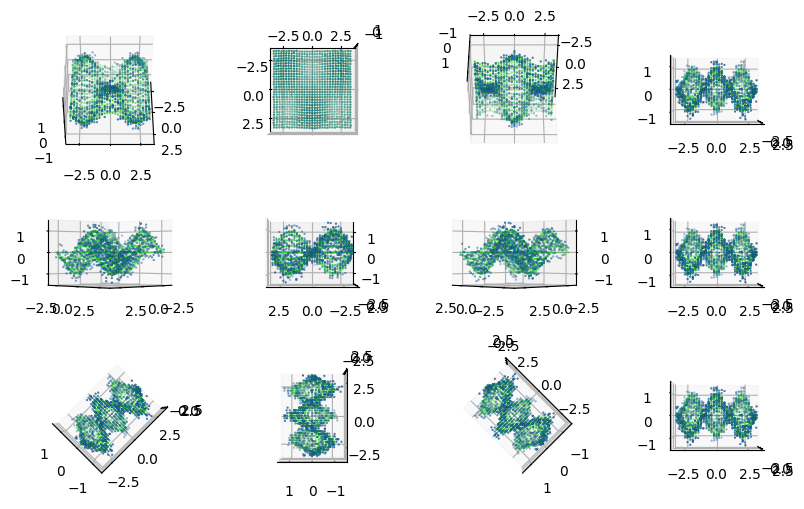

In [653]:
fig = plt.figure()
fig.set_size_inches(10,6)
numSubplots: int = 12
print(fXT_chaos.shape, X.shape, T.shape, XT.shape)
for i in range(1,1 + numSubplots,1):
    ax1 = fig.add_subplot(3,4,i, projection="3d")
    if i in (range(1,5,1)): ax1.view_init(elev=(i%4)*45, azim=0, roll=0)
    elif i in (range(5,9,1)): ax1.view_init(elev=0, azim=(i%4)*45, roll=0)
    elif i in (range(9,13,1)): ax1.view_init(elev=0, azim=0, roll=(i%4)*45)
    ax1.scatter(X, T, fXT_pure, color=(0.1, 0.8, 0.1, 0.8), linewidth=0.1,edgecolor=None, s=2)
    ax1.scatter(X, T, fXT_chaos, color=None, linewidth=0.1, edgecolor="black", s=2)

(961, 2)
(961,)
Finished in 6 iteration, results: [0.895482321457529, 1.5131583034979288], residual magnitude: 1.972214932625844e-10
(961,) (961,) (961,) (961, 2)


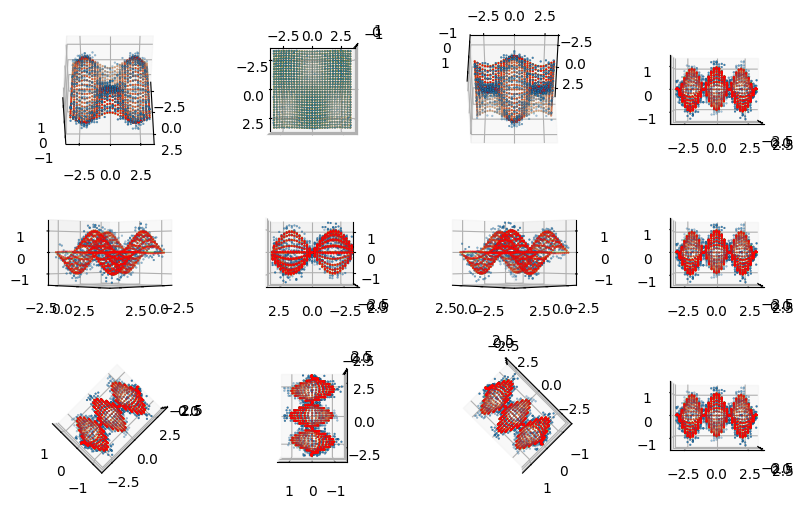

In [654]:
residualVectorMagnitude: float = 1e-9
print(XT.shape)
print(fXT_chaos.shape)
a_estimate: float = 1.1
b_estimate: float = 1.3
a_obtained, b_obtained = gaussNewton(
    fInput= functionPure,
    independent = XT,
    dependent = fXT_chaos,
    a0 = a_estimate,
    b0 = b_estimate,
    tolerance= residualVectorMagnitude,
    maxIter= 10000
)

fXT_regression: npt.NDArray[np.float32] = functionPure(a_obtained, b_obtained, independent=XT)

fig = plt.figure()
fig.set_size_inches(10,6)
numSubplots: int = 12
print(fXT_chaos.shape, X.shape, T.shape, XT.shape)
for i in range(1,1 + numSubplots,1):
    ax1 = fig.add_subplot(3,4,i, projection="3d")
    if i in (range(1,5,1)): ax1.view_init(elev=(i%4)*45, azim=0, roll=0)
    elif i in (range(5,9,1)): ax1.view_init(elev=0, azim=(i%4)*45, roll=0)
    elif i in (range(9,13,1)): ax1.view_init(elev=0, azim=0, roll=(i%4)*45)
    ax1.scatter(X, T, fXT_pure, color= (0.1, 0.8, 0.1, 0.8), linewidth=0.1,edgecolor=None, s=2)
    ax1.scatter(X, T, fXT_chaos, color= None, linewidth=0.1, edgecolor="black", s=2)
    ax1.scatter(X, T, fXT_regression, color= "red", linewidth=0.1, edgecolor=None, s=2)

Pokud zkusíme Jakobián a Gauss-Newtonovu metodu sepsat obecně, aby ty funkce přijímaly obecný počet parametrů, ne 2:

In [655]:
def JacobianGeneral(
    fInput: typing.Callable[[npt.NDArray[np.float32], npt.NDArray[np.float32]], npt.NDArray[np.float32]],
    coefficients: npt.NDArray[np.float32],
    independent: npt.NDArray[np.float32]
    ) -> npt.NDArray[np.float32]:
    
    delta:      float = 1e-3
    gradient:   typing.Sequence[npt.NDArray[np.float32]] = []
    
    if coefficients.ndim > 1: raise ValueError(f"The provided coefficient array is not 1D, the shape is: {coefficients.shape}, ndim: {coefficients.ndim}")
    
    for _ in range(coefficients.size):
        #print(f"estimating partial derivative of function with respect to coefficient_{_}")
        #ad vztah nize: chci, aby derivace byly 0 v pripade, ze derivuji necim, pro co je vse az na stejnou nezavislou promennou nula
        #koeficienty mam pak serazeny
        #napriklad d(2x^2 + y^2)dx = [4x,0]; d(2x^2 + y^2)dy = [0,2y] 
        delta_ti: npt.NDArray[np.float32] = np.zeros_like(coefficients).astype(float) # chci floaty, ne defaultni integery
        delta_ti[_] += delta
        
        dfdcoeff: npt.NDArray[np.float32] = (fInput(coefficients + delta_ti, independent) - fInput(coefficients - delta_ti, independent))/(2*delta)
        gradient.append(dfdcoeff)
    
    result:npt.NDArray[np.float32]=  np.column_stack(gradient)
    return result


def gaussNewtonGeneral(
    fInput: typing.Callable[[npt.NDArray[np.float32], npt.NDArray[np.float32]], npt.NDArray[np.float32]],
    coefficients: npt.NDArray[np.float32],
    independent: npt.NDArray[np.float32],
    dependent: npt.NDArray[np.float32],
    tolerance: typing.Optional[float] = 1e-9,
    minIter: typing.Optional[int] = 50,
    maxIter: typing.Optional[int] = 10000
) -> npt.NDArray[np.float32]:

    old:npt.NDArray[np.float32] = coefficients[:]
    new:npt.NDArray[np.float32] = old[:]
    iteration: int = 0
    
    while (iteration < maxIter):
        old                             = new[:]    
        J:npt.NDArray[np.float32]       = JacobianGeneral(fInput=fInput, coefficients=old, independent=independent)
        yTilde:npt.NDArray[np.float32]  = dependent - fInput(coefficients=old, independent=independent)
        new                             = old + np.linalg.inv(J.T@J)@J.T@yTilde #linalg.inv namísto np.matrix(...).I
        
        iteration += 1
        if iteration% 500 == 0: print(iteration, new.tolist(), np.linalg.norm(old-new))
        if (np.linalg.norm(old-new) < tolerance) and (iteration > minIter): break
    print(f"Finished in {iteration} iteration, results: {new.tolist()}, residual magnitude: {np.linalg.norm(old-new)}")
    return new

Nafitujme funkci ve tvaru níže:
$f(x,y) = \pi xy - \frac{x^2}{2} + \frac{y^2}{\frac{\pi}{3}}$

In [656]:
a:float = np.pi
b:float = 2.0
c:float = np.pi/3
coeffs: npt.NDArray[np.float32] = np.array([a,b,c])


def functionPure(coefficients: npt.NDArray[np.float32], independent: npt.NDArray[np.float32]) -> npt.NDArray[np.float32]:
    return (coefficients[0]*independent[:,0]*independent[:,1]) - ((independent[:,0]**2)/coefficients[1]) + ((independent[:,1]**2)/coefficients[2])

def functionChaos(coefficients: npt.NDArray[np.float32], independent: npt.NDArray[np.float32], chaosMagnitude: typing.Optional[float] = 1.25) -> npt.NDArray[np.float32]:
    base: npt.NDArray[np.float32] =  functionPure(coefficients, independent)
    return np.random.normal(base, chaosMagnitude, len(base))

[3.14159265 2.         1.04719755]
[2.90250841 1.91584692 1.45629726]
Finished in 51 iteration, results: [3.194818490270793, 2.7735734434095334, 1.16263518706585], residual magnitude: 5.193397367488452e-13
(961,) (441,) (961,) (961, 2)
[3.14159265 2.         1.04719755]
[2.90250841 1.91584692 1.45629726]
[3.19481849 2.77357344 1.16263519]


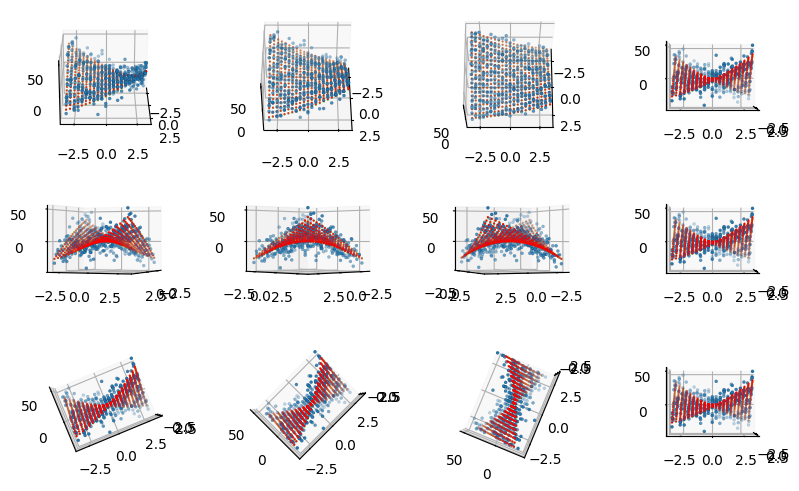

In [658]:
baseElemCount: int = 21
elem:      npt.NDArray[np.float32] = np.linspace(-np.pi, +np.pi,baseElemCount)
X1: npt.NDArray[np.float32]
X2: npt.NDArray[np.float32]
XY: npt.NDArray[np.float32]

X1,X2   =  np.meshgrid(elem, elem)
XY      = np.column_stack([X1.ravel(), X2.ravel()]) # alternativa, která mi umožní slepit dva arraye vyplivnuté meshgridem v 1, pak mohu indexovat.
X:     npt.NDArray[np.float32] = XY[:,0]
Y:     npt.NDArray[np.float32] = XY[:,1]

fXY_chaos: npt.NDArray[np.float32] = functionChaos(coefficients=coeffs, independent=XY, chaosMagnitude=10)
fXY_pure: npt.NDArray[np.float32]  = functionPure(coefficients=coeffs, independent=XY)

chaosMagnitude: float = 0.25
coeffs_estimated: npt.NDArray[np.float32]   = np.random.normal(coeffs, chaosMagnitude, coeffs.size)
print(coeffs)
print(coeffs_estimated)

coeffs_obtained: npt.NDArray[np.float32]    = gaussNewtonGeneral(fInput=functionPure, coefficients= coeffs_estimated, independent=XY, dependent=fXY_chaos)
fXY_regression: npt.NDArray[np.float32]     = functionPure(coefficients=coeffs_obtained, independent=XY)

fig = plt.figure()
fig.set_size_inches(10,6)
numSubplots: int = 12
print(fXT_chaos.shape, X.shape, T.shape, XT.shape)

print(coeffs)
print(coeffs_estimated)
print(coeffs_obtained)

for i in range(1,1 + numSubplots,1):
    ax1 = fig.add_subplot(3,4,i, projection="3d")
    if i in (range(1,5,1)): ax1.view_init(elev=(i%4)*22.5, azim=0, roll=0)
    elif i in (range(5,9,1)): ax1.view_init(elev=0, azim=(i%4)*22.5, roll=0)
    elif i in (range(9,13,1)): ax1.view_init(elev=0, azim=0, roll=(i%4)*22.5)
    ax1.scatter(X, Y, fXY_pure, color=(0.1, 0.8, 0.1, 0.8), linewidth=0.1,edgecolor=None, s=2)
    ax1.scatter(X, Y, fXY_chaos, color=None, linewidth=0.1, edgecolor="black", s=5)
    ax1.scatter(X, Y, fXY_regression, color= "red", linewidth=0.1, edgecolor=None, s=2)

Scipy stejnou funkci obsahuje, nicméně vyžaduje, aby do ní člověk poslal nikoliv funkci, ale funkci tvořící reziduál.

In [663]:
import scipy.optimize as scipyOpt
def functionPureResidualGiver(coefficients: npt.NDArray[np.float32], independent: npt.NDArray[np.float32], dependent: npt.NDArray[np.float32]) -> npt.NDArray[np.float32]:
    return functionPure(coefficients=coefficients, independent=independent) - dependent
resultScipy = scipyOpt.least_squares(fun=functionPureResidualGiver, x0=coeffs_estimated, args=(XY, fXY_chaos))

print(coeffs)
print(coeffs_estimated)
print(coeffs_obtained)
print(resultScipy.x)

[3.14159265 2.         1.04719755]
[2.90250841 1.91584692 1.45629726]
[3.19481849 2.77357344 1.16263519]
[3.19481849 2.77357342 1.16263519]
